# Device Price Classification Model


## Data Preparation and Exploratory Data Analysis (EDA)

### Loading the Data

In [39]:
import pandas as pd

# Load training and testing data
train_data = pd.read_csv('train - train.csv')
test_data = pd.read_csv('test - test.csv')

print(train_data.head())


   battery_power  blue  clock_speed  dual_sim    fc  four_g  int_memory  \
0            842     0          2.2         0   1.0     0.0         7.0   
1           1021     1          0.5         1   0.0     1.0        53.0   
2            563     1          0.5         1   2.0     1.0        41.0   
3            615     1          2.5         0   0.0     0.0        10.0   
4           1821     1          1.2         0  13.0     1.0        44.0   

   m_dep  mobile_wt  n_cores  ...  px_height  px_width     ram  sc_h  sc_w  \
0    0.6      188.0      2.0  ...       20.0     756.0  2549.0   9.0   7.0   
1    0.7      136.0      3.0  ...      905.0    1988.0  2631.0  17.0   3.0   
2    0.9      145.0      5.0  ...     1263.0    1716.0  2603.0  11.0   2.0   
3    0.8      131.0      6.0  ...     1216.0    1786.0  2769.0  16.0   8.0   
4    0.6      141.0      2.0  ...     1208.0    1212.0  1411.0   8.0   2.0   

   talk_time  three_g  touch_screen  wifi  price_range  
0         19        0  

### Basic Data Cleaning

In [40]:
# Check for missing values
print(train_data.isnull().sum())



battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               5
four_g           5
int_memory       5
m_dep            5
mobile_wt        4
n_cores          4
pc               5
px_height        4
px_width         2
ram              2
sc_h             1
sc_w             1
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


### EDA (Exploratory Data Analysis)

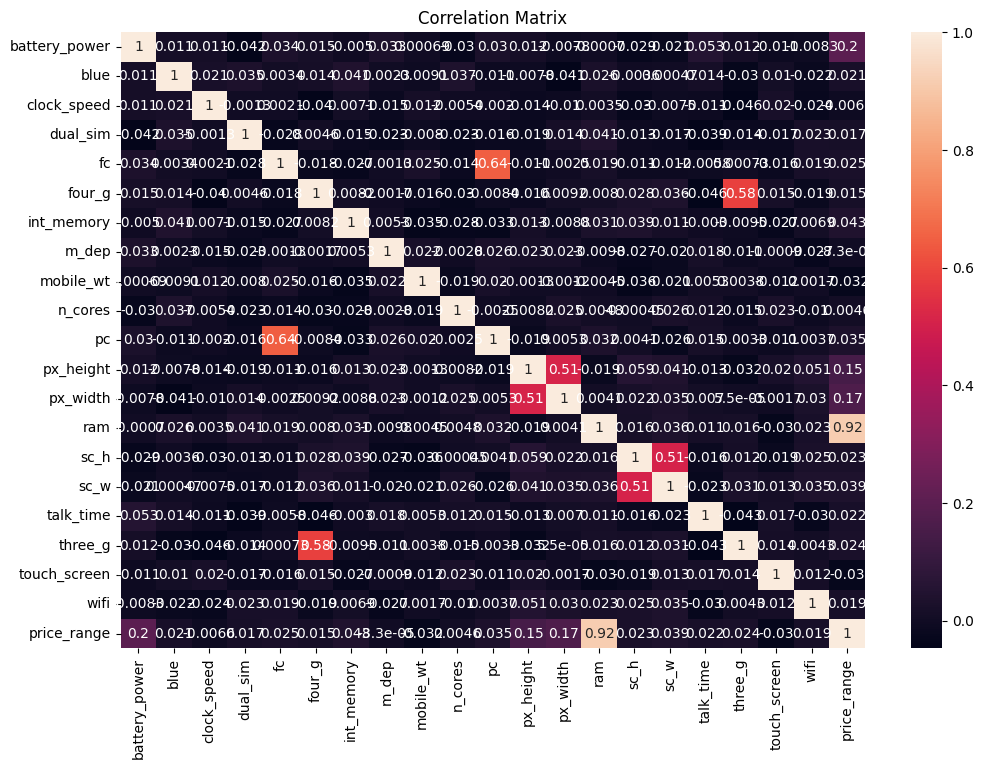

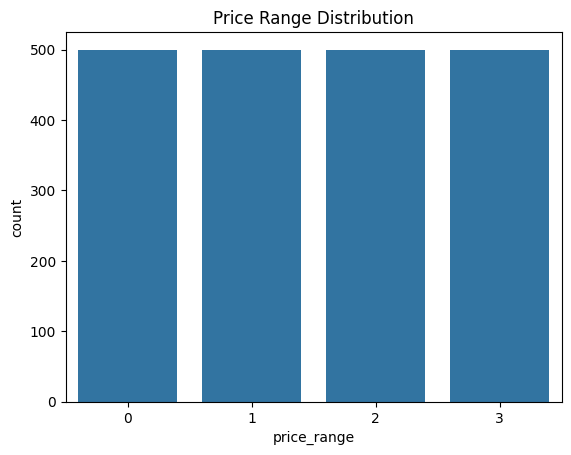

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting correlations
plt.figure(figsize=(12, 8))
sns.heatmap(train_data.corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

# Distribution of price range
sns.countplot(x='price_range', data=train_data)
plt.title("Price Range Distribution")
plt.show()


### Feature Engineering


## Model Training

### Train-Test Split

In [42]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = train_data.drop('price_range', axis=1)
y = train_data['price_range']

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)




### Model Selection and Training

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_val)
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))


[[101   4   0   0]
 [  7  76   8   0]
 [  0   6  82   4]
 [  0   0  13  99]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       105
           1       0.88      0.84      0.86        91
           2       0.80      0.89      0.84        92
           3       0.96      0.88      0.92       112

    accuracy                           0.90       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.90      0.90       400



## Model Optimization

### Hyperparameter Tuning


In [44]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30]
}

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model from grid search
best_model = grid_search.best_estimator_

# Predictions and evaluation of optimized model
y_pred_optimized = best_model.predict(X_val)
print(confusion_matrix(y_val, y_pred_optimized))
print(classification_report(y_val, y_pred_optimized))


c:\Users\Abd Alyoussef\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Abd Alyoussef\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Abd Alyoussef\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Abd Alyoussef\AppData\Local\Programs\Python\Python312\

[[101   4   0   0]
 [  7  75   9   0]
 [  0   5  81   6]
 [  0   0  13  99]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       105
           1       0.89      0.82      0.86        91
           2       0.79      0.88      0.83        92
           3       0.94      0.88      0.91       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



In [45]:
# Check if 'id' column exists
if 'id' in test_data.columns:
    # Keep the 'id' column for reference
    ids = test_data['id']
    # Drop the 'id' column for model processing
    test_data = test_data.drop(['id'], axis=1)
else:
    # If 'id' column is not present, handle accordingly
    ids = None

# Align the test data columns to the training data columns
test_data = test_data.reindex(columns=X_train.columns, fill_value=0)

# Select 10 random devices from the test dataset
sample_indices = test_data.sample(10, random_state=42).index
sample_test_data = test_data.loc[sample_indices]

# Get the ids corresponding to the sampled data if available
if ids is not None:
    sample_ids = ids.loc[sample_indices]
else:
    sample_ids = ["Unknown"] * len(sample_indices)

# Predict the price range for the selected devices using 'best_model'
predictions = best_model.predict(sample_test_data)

# Display the predictions with IDs
print("Predictions for the 10 selected devices:")
for i, device_id in enumerate(sample_ids):
    predicted_value = predictions[i]
    print(f"Device ID {device_id}: Predicted Price Range = {predicted_value}")

Predictions for the 10 selected devices:
Device ID 522: Predicted Price Range = 2
Device ID 738: Predicted Price Range = 1
Device ID 741: Predicted Price Range = 0
Device ID 661: Predicted Price Range = 1
Device ID 412: Predicted Price Range = 2
Device ID 679: Predicted Price Range = 3
Device ID 627: Predicted Price Range = 3
Device ID 514: Predicted Price Range = 0
Device ID 860: Predicted Price Range = 2
Device ID 137: Predicted Price Range = 1


In [46]:
import pickle
# Save the trained model to a file
with open('device_price_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
